<a href="https://colab.research.google.com/github/DeviprasadGunturu/AIML/blob/main/Labassignment8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:1027: UserWarning: Version 1 of dataset car is inactive, meaning that issues have been found in the dataset. Try using a newer version from this URL: https://api.openml.org/data/v1/download/21/car.arff
  warn(


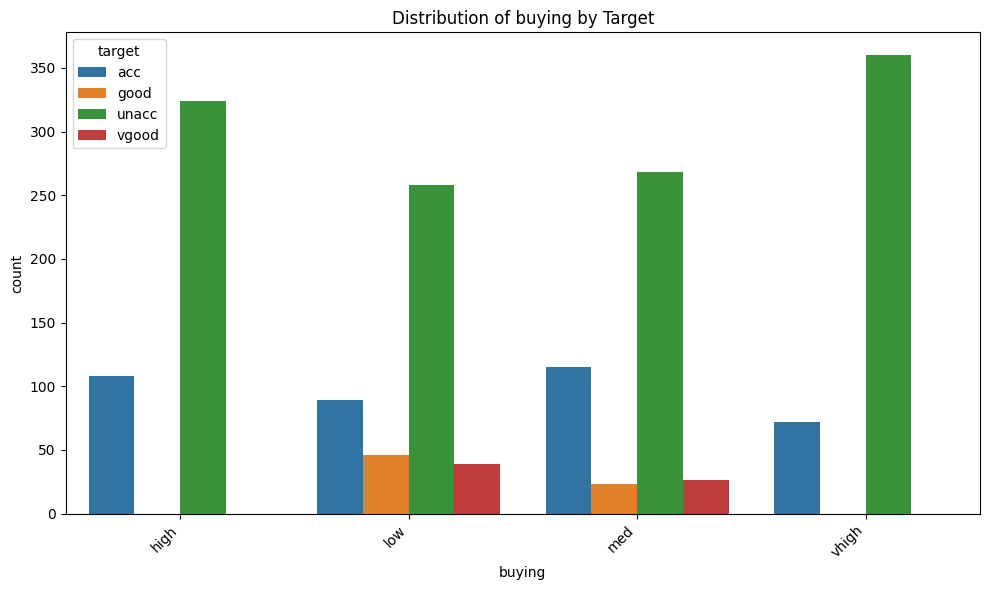

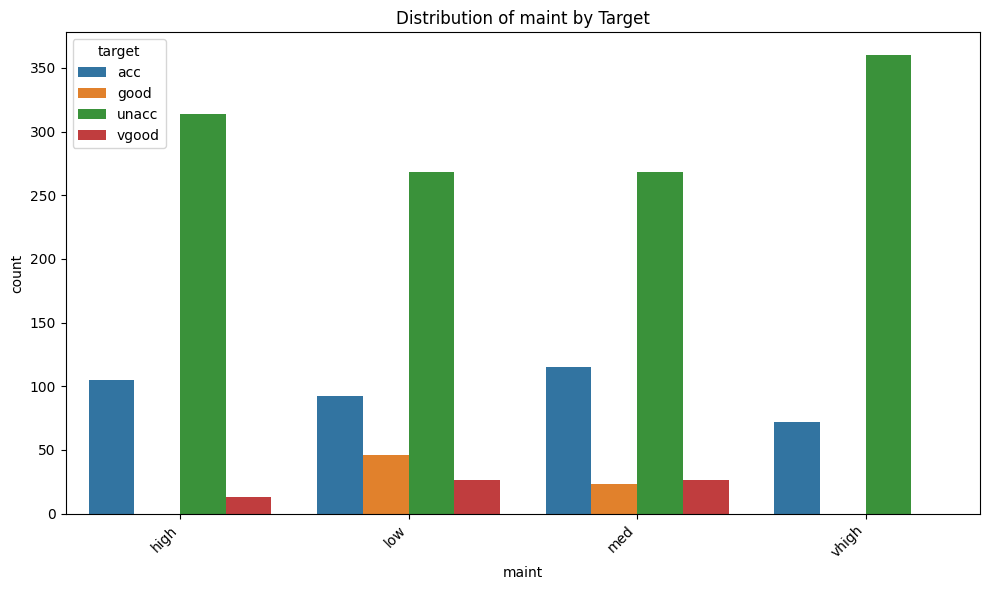

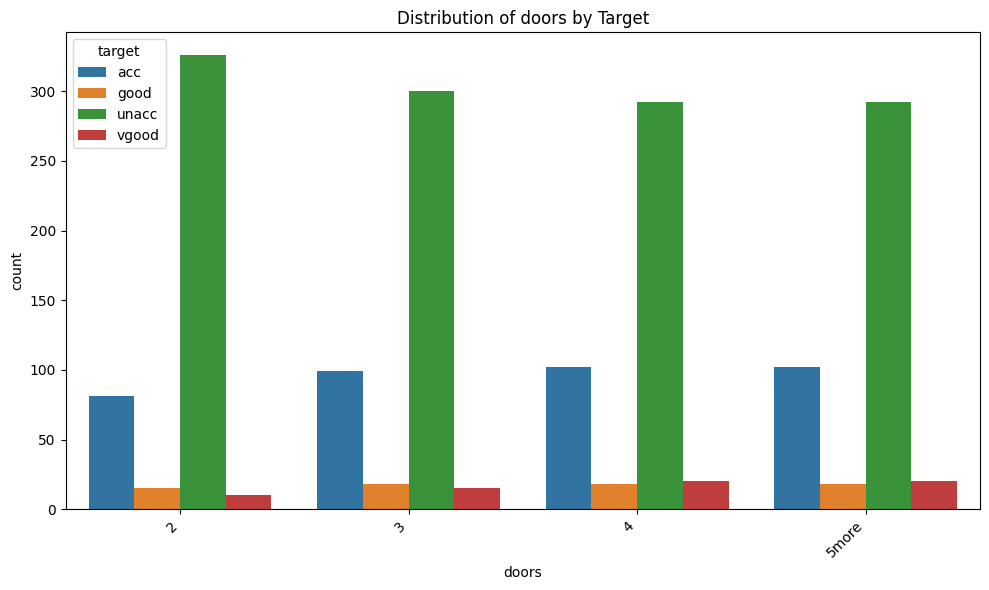

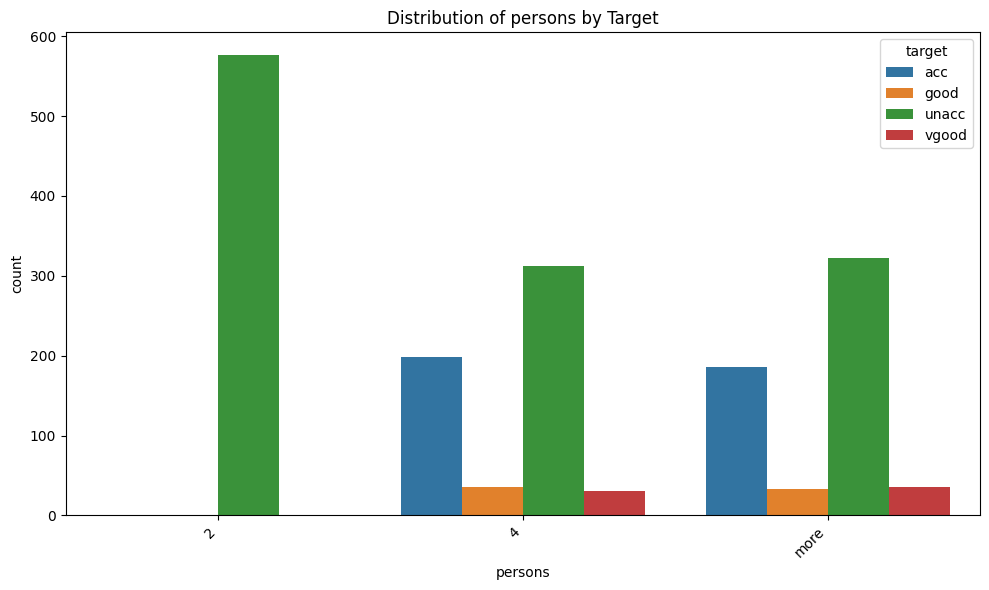

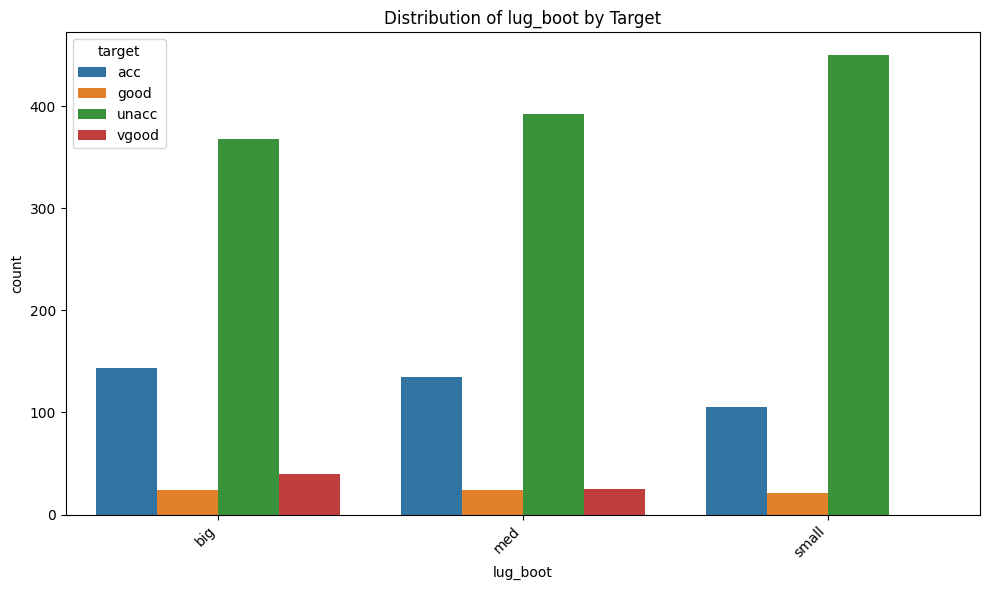

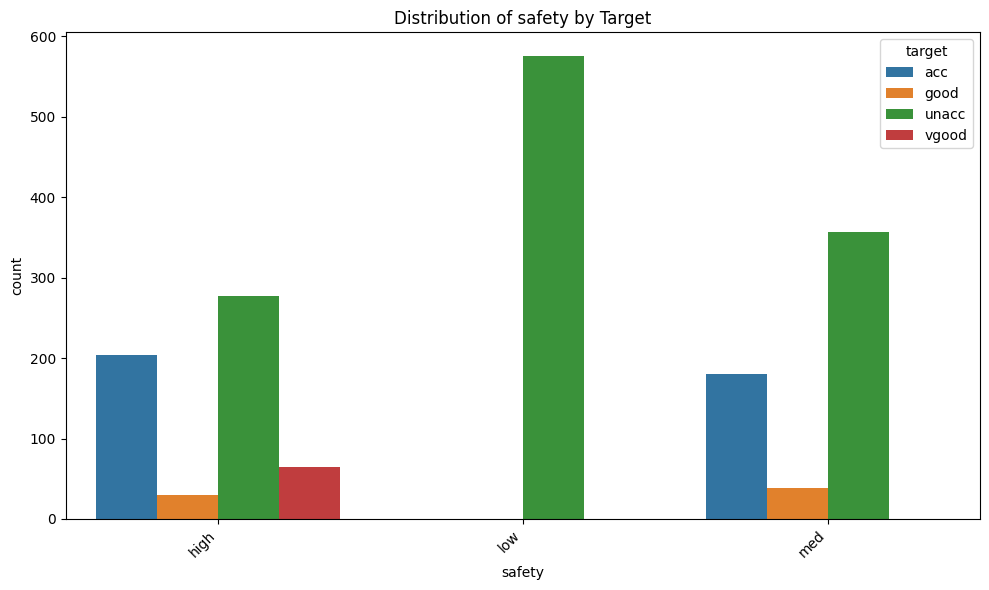

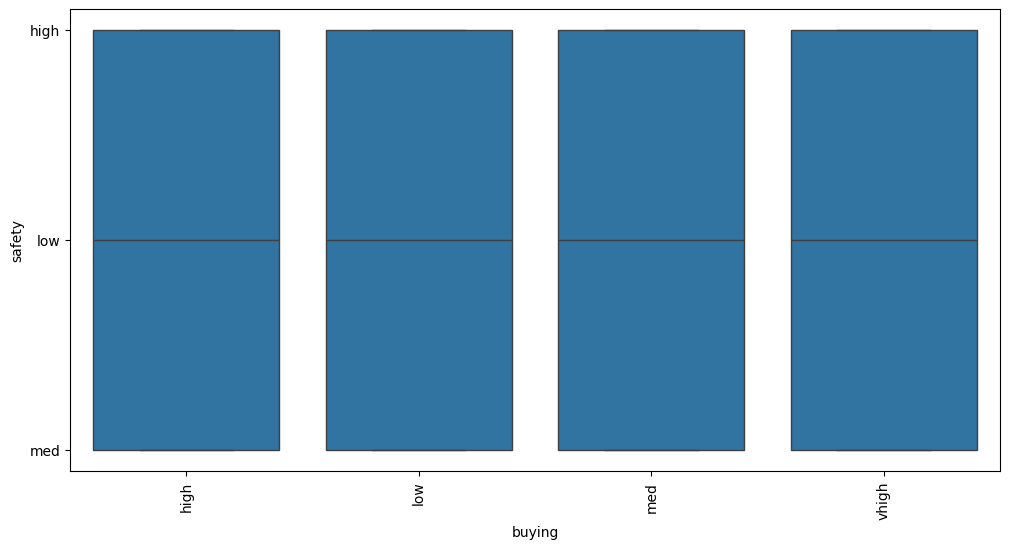

Accuracy: 0.96
              precision    recall  f1-score   support

         acc       0.95      0.90      0.92       118
        good       0.71      0.89      0.79        19
       unacc       0.99      0.99      0.99       358
       vgood       0.83      0.79      0.81        24

    accuracy                           0.96       519
   macro avg       0.87      0.89      0.88       519
weighted avg       0.96      0.96      0.96       519

[[106   5   4   3]
 [  1  17   0   1]
 [  2   0 356   0]
 [  3   2   0  19]]


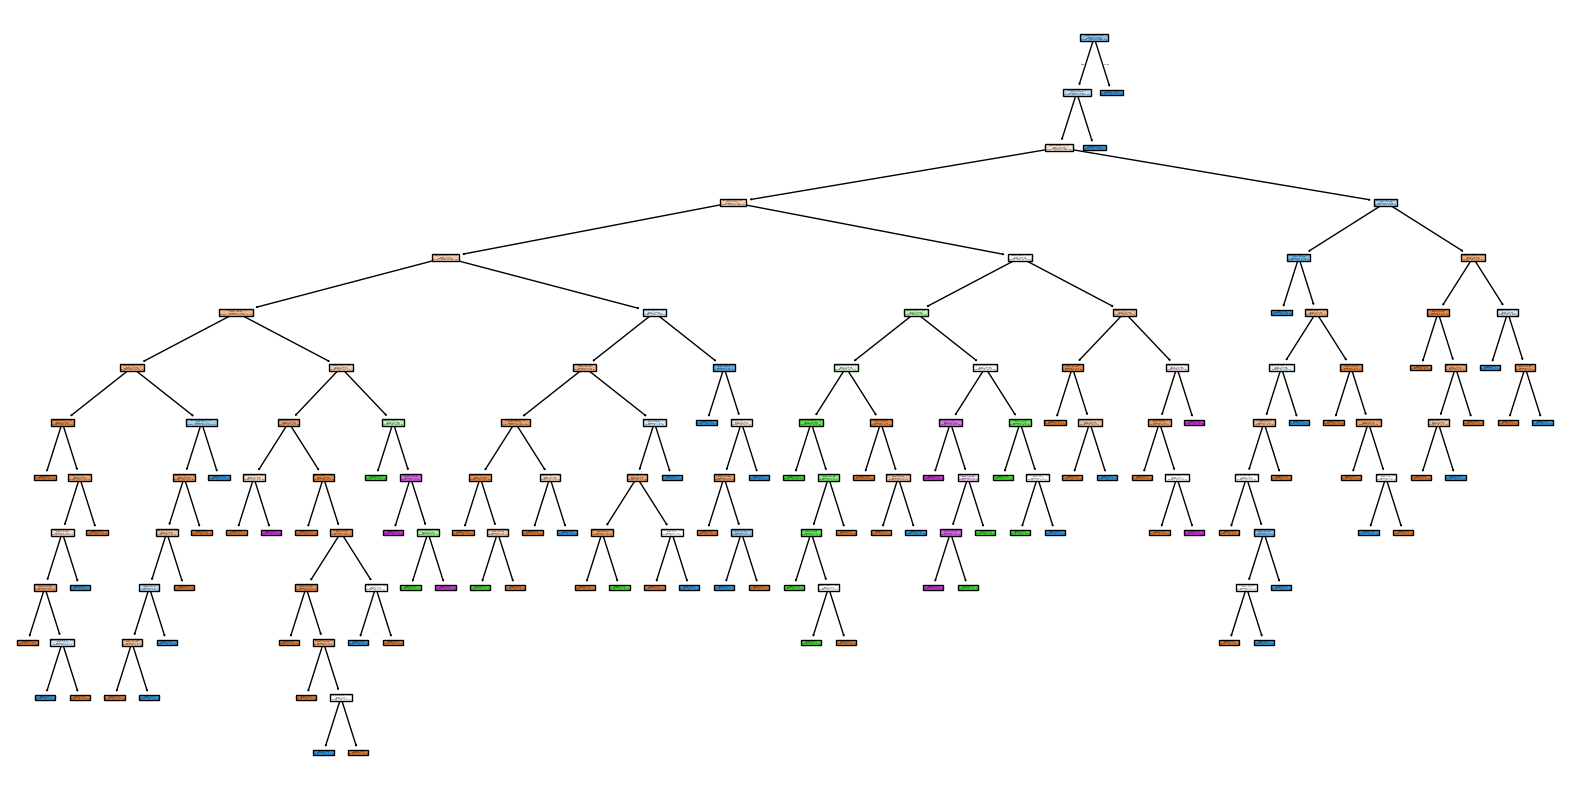

Best Params: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2}
Improved Accuracy: 0.95
              precision    recall  f1-score   support

         acc       0.94      0.86      0.90       118
        good       0.74      0.89      0.81        19
       unacc       0.98      0.99      0.98       358
       vgood       0.83      0.79      0.81        24

    accuracy                           0.95       519
   macro avg       0.87      0.89      0.88       519
weighted avg       0.95      0.95      0.95       519

[[102   4   9   3]
 [  1  17   0   1]
 [  3   0 355   0]
 [  3   2   0  19]]


In [1]:
# Import libraries
import pandas as pd, seaborn as sns, matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.datasets import fetch_openml

# Load and prepare dataset
car_data = fetch_openml(name='car', version=1)
car_df = pd.DataFrame(data=car_data.data, columns=car_data.feature_names)
car_df['target'] = car_data.target
X, y = pd.get_dummies(car_df.drop('target', axis=1)), car_df['target']

# Data visualization
for feature in car_df.columns[:-1]:  # Exclude 'target' column
    plt.figure(figsize=(10, 6))
    sns.countplot(data=car_df, x=feature, hue='target')
    plt.title(f'Distribution of {feature} by Target')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()
# Alternative, use a boxplot directly with the original car_df
plt.figure(figsize=(12, 6))
sns.boxplot(data=car_df, x='buying', y='safety') # Example with buying and safety
plt.xticks(rotation=90)
plt.show()

# Split data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train the Decision Tree Classifier
dt_classifier = DecisionTreeClassifier().fit(X_train, y_train)
y_pred = dt_classifier.predict(X_test)

# Evaluate performance
print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

# Plot decision tree
plt.figure(figsize=(20,10)); plot_tree(dt_classifier, filled=True, feature_names=X.columns); plt.show()

# Hyperparameter tuning using GridSearchCV
param_grid = {'max_depth': [None, 10, 20], 'min_samples_split': [2, 10], 'min_samples_leaf': [1, 5]}
grid_search = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=5).fit(X_train, y_train)
print(f"Best Params: {grid_search.best_params_}")
y_pred_gs = grid_search.predict(X_test)

# Evaluate tuned model
print(f"Improved Accuracy: {accuracy_score(y_test, y_pred_gs):.2f}")
print(classification_report(y_test, y_pred_gs))
print(confusion_matrix(y_test, y_pred_gs))